In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf

import statsmodels.api as sm
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
import warnings 
warnings.filterwarnings("ignore")

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac

C:\Users\kulde\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 72E3-1983

 Directory of C:\Users\kulde\ExcelR\Assignment Practice\Logistic Regression

30-11-2022  10:09    <DIR>          .
24-11-2022  01:29    <DIR>          ..
15-11-2022  07:13    <DIR>          .ipynb_checkpoints
11-11-2022  09:10         4,610,348 bank-full (1).csv
30-11-2022  10:09           121,431 Logistic Regression.ipynb
11-11-2022  09:10             1,886 Problem-Statement(Bank_data) (1).txt
               3 File(s)      4,733,665 bytes
               3 Dir(s)  354,429,865,984 bytes free


In [3]:
bank_full=pd.read_csv("bank-full (1).csv",sep=";")
bank_full

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


In [4]:
bank_full.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [5]:
bank_full.value_counts()

age  job         marital   education  default  balance  housing  loan  contact    day  month  duration  campaign  pdays  previous  poutcome  y  
18   student     single    primary    no       608      no       no    cellular   12   aug    267       1         -1     0         unknown   yes    1
45   management  married   tertiary   no       0        no       no    cellular   20   aug    71        2         -1     0         unknown   no     1
                 divorced  tertiary   no       54       no       yes   cellular   21   jul    34        3         -1     0         unknown   no     1
                                               220      yes      no    unknown    18   jun    89        4         -1     0         unknown   no     1
                                               335      no       no    cellular   5    aug    297       1         -1     0         unknown   no     1
                                                                                                         

In [6]:
bank_full.shape

(45211, 17)

In [7]:
bank_full_u = pd.get_dummies(bank_full, columns = ['job','marital','education',"housing","default","loan","contact","month","poutcome"])
bank_full_u.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1


In [8]:
column_to_move = bank_full_u.pop("y")
bank_full_u.insert(51, "y", column_to_move)

In [9]:
bank_full_u

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,no
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,no
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,yes
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,yes
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,yes
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,no


In [10]:
bank_full_u['y'] = LE.fit_transform(bank_full_u['y'])

In [11]:
bank_full_u

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,y
0,58,2143,5,261,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,44,29,5,151,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
2,33,2,5,76,1,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,47,1506,5,92,1,-1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,33,1,5,198,1,-1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45207,71,1729,17,456,2,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,1
45208,72,5715,17,1127,5,184,3,0,0,0,...,0,0,1,0,0,0,0,1,0,1
45209,57,668,17,508,4,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0


<AxesSubplot:>

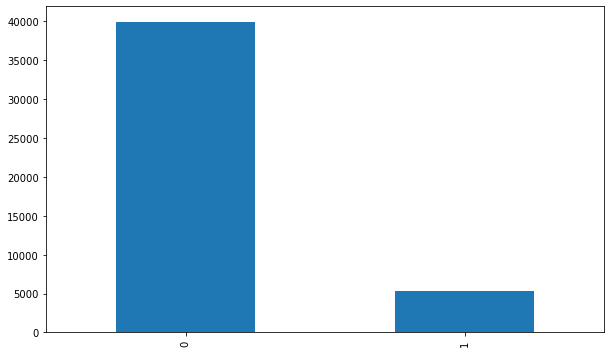

In [12]:
plt.figure(figsize=(10,6))
bank_full_u["y"].value_counts().plot(kind="bar")

<AxesSubplot:ylabel='y'>

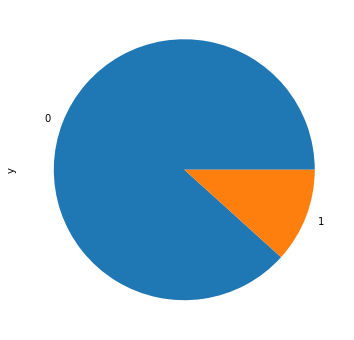

In [13]:
plt.figure(figsize=(10,6))
bank_full_u["y"].value_counts().plot(kind="pie")

In [14]:
X = bank_full_u.iloc[:,0:-1]
Y = bank_full_u.iloc[:,-1]

In [15]:
X.head(1)

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [16]:
Y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

# Creating model without spliting data into train and test

In [17]:
model = LogisticRegression()
model.fit(X,Y)

LogisticRegression()

In [18]:
model.intercept_,model.coef_

(array([-0.27786889]),
 array([[-2.06777876e-02,  2.13713735e-05, -1.21445089e-02,
          3.82775633e-03, -3.89559606e-01,  2.54230410e-03,
         -1.10601351e-01, -2.55536271e-02, -2.47829446e-01,
         -2.67666295e-02, -9.20622283e-03,  6.46666002e-03,
          1.63211556e-01, -1.60927945e-02, -8.71206435e-02,
          2.93940298e-02, -6.89871423e-02,  2.44785417e-03,
          2.19355492e-03,  1.62510045e-02, -1.70670282e-01,
         -1.23423574e-01, -6.88414070e-02, -2.67429270e-01,
          4.53087504e-02,  1.31190748e-02,  3.56401195e-01,
         -6.34244046e-01, -2.57971923e-01, -1.98709281e-02,
         -8.18903925e-02, -1.95952459e-01,  9.05244791e-02,
          4.93376091e-02, -4.17704940e-01,  4.29813899e-02,
          1.95515112e-02,  2.83908380e-02, -1.46794114e-02,
         -1.42960907e-02, -8.39309541e-02, -5.54732641e-02,
          8.60293396e-02, -4.01515151e-01, -5.60942048e-02,
          9.75576445e-02,  7.36355014e-02, -1.33441194e-01,
         -3.16627

In [19]:
y_pred = model.predict(X)

In [20]:
y_pred_df= pd.DataFrame({'actual': Y,
                         'predicted_values': model.predict(X)})

y_pred_df

,actual,predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score as ac
confusion_matrix = confusion_matrix(Y,y_pred)
print (confusion_matrix)

[[39141   781]
 [ 4109  1180]]


In [22]:
ac(Y,y_pred)

0.891840481298799

# Creating model by spliting data into train and test

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.30,shuffle=True)

In [24]:
x_train

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
44428,34,69,4,120,3,1,6,1,0,0,...,0,0,0,0,0,0,0,0,1,0
16879,25,156,25,602,5,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2728,28,468,13,152,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4461,36,412,20,127,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
35819,37,331,8,94,3,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6074,36,-870,26,102,2,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
12947,39,18,7,75,3,-1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
30530,34,1076,5,136,10,-1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
34742,35,5417,6,303,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [25]:
x_test

,age,balance,day,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
45035,47,3676,18,567,1,95,3,1,0,0,...,0,0,0,0,1,0,0,0,1,0
11053,54,468,17,207,3,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
10088,35,234,11,88,5,-1,0,0,1,0,...,1,0,0,0,0,0,0,0,0,1
40412,79,668,2,363,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
39999,38,1442,3,113,1,119,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41272,36,506,25,47,1,120,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
41835,37,1960,15,246,5,-1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
21066,30,4561,14,103,2,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
44070,31,3511,2,667,1,-1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [26]:
model1 = LogisticRegression()
model1.fit(x_train,y_train)

LogisticRegression()

In [27]:
y_train_pred=model1.predict(x_train)

In [28]:
ac(y_train,y_train_pred)

0.8898789774702184

In [29]:
y_test_pred=model1.predict(x_test)

In [30]:
ac(y_test,y_test_pred)

0.8891919787673253

In [31]:
bank_full_u.y.value_counts()

0    39922
1     5289
Name: y, dtype: int64

In [32]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test_pred,y_test)


array([[11700,  1203],
       [  300,   361]], dtype=int64)

In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.91      0.94     12903
           1       0.23      0.55      0.32       661

    accuracy                           0.89     13564
   macro avg       0.60      0.73      0.63     13564
weighted avg       0.94      0.89      0.91     13564

